# Analiza dejavnikov zaposljivosti

### Projekt pri predmetu Tehnologije znanja
###### Tjaša Malok, ITK UNI 3, 2021/2022

Pri projektu predmeta Tehnologije znanja sem se odločila analizirati dejavnike zaposljivosti. Na spletni strani Kaggle.com sem izbrala podatke, ki predstavljajo različne podatke študentov na izbrani univerzi, kot so na primer dokončana izobrazba, področje študija, delovne izkušnje in višina plačila, ki jim je bila ponujena po šolanju. Podatki so bili zbrani leta 2019, sodelovali pa so le študenti iz specializacij Marketing and HR in Marketing and Finance.

Moj cilj projekta je analizirati dejavnike, ki najbolj vplivajo na pridobivanje zaposlitve. Preverila bom možne korelacije med dejavniki, klasificirala bom, ali bo kandidat sprejet na zaposlitev ali ne, s pomočjo regresije pa bom poskušala napovedati pričakovano ponujeno plačilo. Preverili bomo tudi, kateri kadri so bolj iskani in ali spol vpliva na višino plačila.

Najprej pridobimo podatke, ki so zbrani v csv datoteki.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df =  pd.read_csv("Placement_Data_Full_Class.csv", index_col=0, sep=",", decimal=".")
df.head(n=10)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0


Izpisali smo si prvih 10 vrstic. 
Na kratko razložimo pomen posameznega stolpca:
- sl_no - identifikacijska številka
- gender - spol (M/F)
- ssc_p - osnovnošolska izobrazba
- ssc_b - območje osnovnošolske izobrazbe (Central, Others)
- hsc_p - srednješolska izobrazba
- hsc_b - območje srednješolske izobrazbe (Central, Others)
- hsc_s - področje srednješolskega šolanja
- degree_p - ocena zaključnega izpita dodiplomskega študija (%)
- degree_t - področje dodiplomskega študija
- workex - delovne izkušnje (Yes/No)
- etest_p - ocena testa za zaposljivost po koncu študija (%) (sestavljen je iz raznih testov spodobnosti, razprav, predstavitev in testov mehkih veščin)
- specialisation - področje podiplomskega študija
- mba_p - ocena zaključnega izpita podiplomskega študija (%)
- status - ali je bil kandidat zaposlen (Placed/Not placed)
- salary - ponujena plača za izbrano delovno mesto (rupijev/leto)

In [3]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,214.000000,214.000000,214.000000,214.000000,214.000000,147.000000
mean,67.333785,66.323505,66.378458,72.051215,62.268551,284224.489796
std,10.843397,10.922138,7.374995,13.287308,5.845347,76606.340801
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.550000,60.850000,61.000000,60.000000,57.922500,240000.000000
50%,67.000000,65.000000,66.000000,70.500000,61.950000,265000.000000
75%,75.850000,73.000000,72.000000,83.750000,66.267500,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,690000.000000


In [4]:
df.dtypes

gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

Izpisali smo si tudi statistiko številskih stolpcev in tipe stolpcev. Podatki so tipa object in float64. Preverimo še manjkajoče vrednosti.

In [5]:
df.isnull().sum() 

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

Vidimo, da nimamo veliko manjkajočih podatkov. Pojavljajo se le v stolpcu "salary", kar je pričakovano, saj vsi študenti iz raziskave še nimajo določene plače, saj še niso vsi zaposleni.

### Raziskovanje podatkov po posameznih atributih

#### KORELACIJE

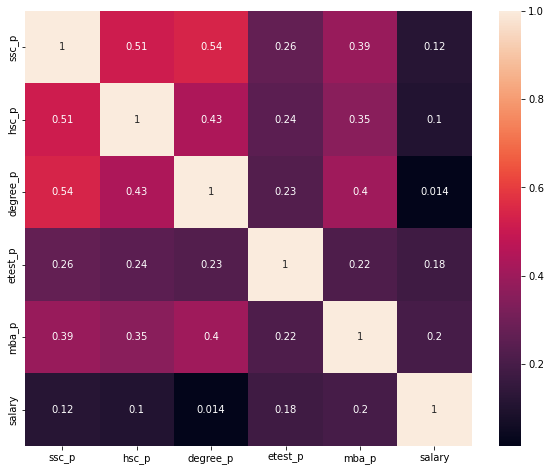

In [6]:
plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True);

Vidimo, da med atributi ni posebno izstopajoče korelacije. 

Nekaj korelacije se kaže med osnovnošolsko in srednješolsko izobrazbo ter rezultatih na didiplomskem študiju, nakar lahko sklepamo, da osebe, ki so imele dobre dosežke že v osnovni in srednji šoli, se trudijo dosegati dobre rezultate še naprej.

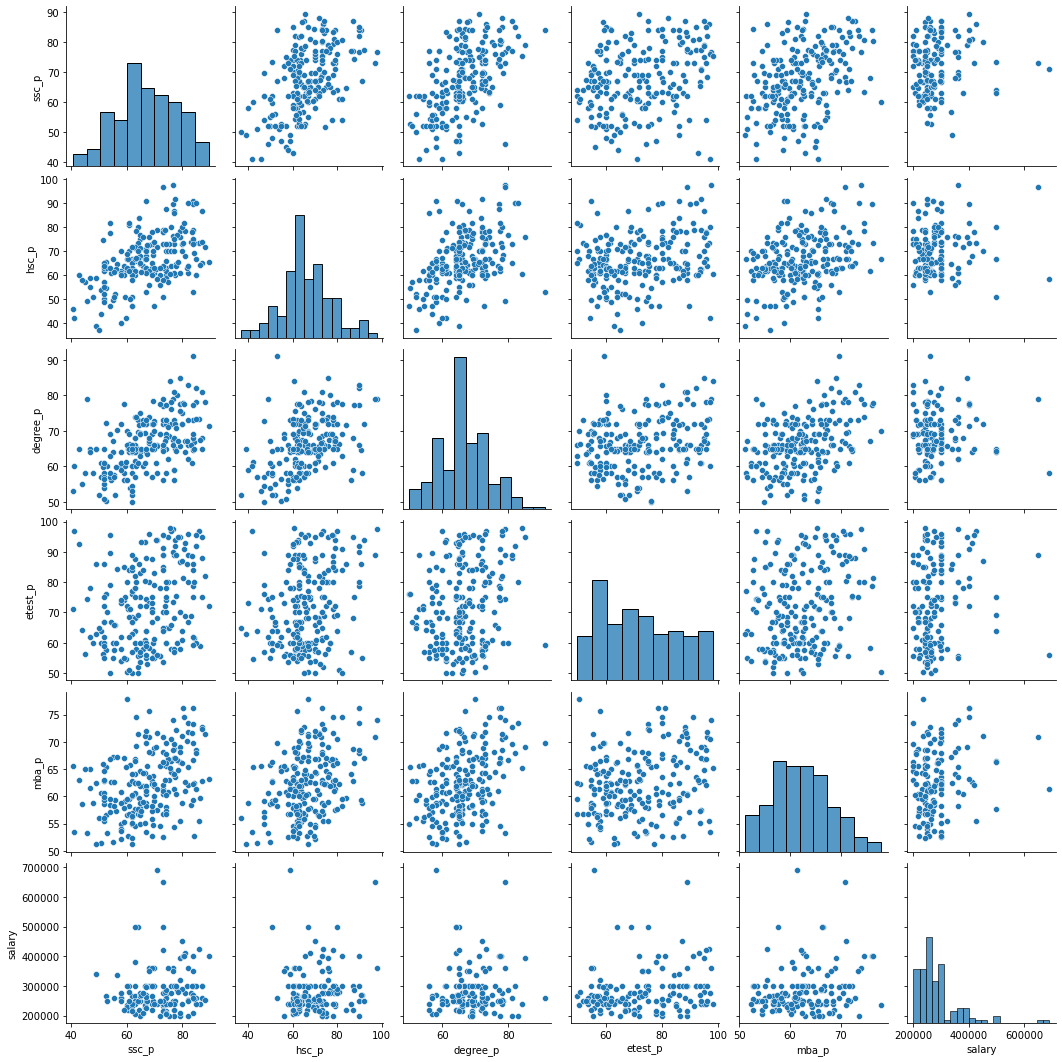

In [7]:
sns.pairplot(df)

Slednji pairplot prikazuje odvisnosti med vsemi numeričnimi spremenljivkami.

#### SPOL

In [8]:
df['gender'].value_counts()

M    138
F     76
Name: gender, dtype: int64

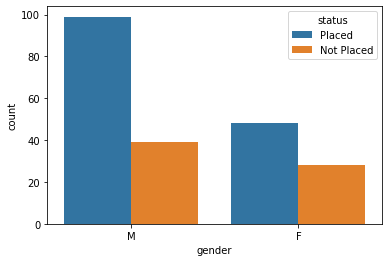

In [9]:
sns.countplot("gender", hue="status", data=df)
plt.show()

Naša množica študentov je sestavljena iz 138 moških in 76 žensk. V slednjem grafu smo prikazali, koliko od teh je bilo sprejetih in koliko ne. Na delo ni bilo sprejetih 30 študentk in 40 študentov. Posebnih odstopanj ne opazimo, v obeh primerih je to nekje 2/3 vseh. 

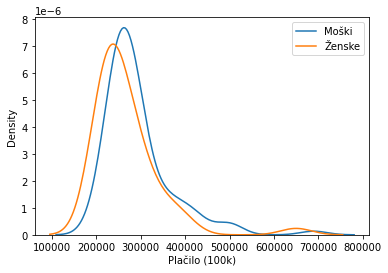

In [10]:
sns.kdeplot(df.salary[ df.gender=="M"])
sns.kdeplot(df.salary[ df.gender=="F"])
plt.legend(['Moški', 'Ženske'])
plt.xlabel('Plačilo (100k)')
plt.show()

Povprečno je bila moškim ponujena rahlo višja plača.

#### Ali osnovnošolska izobrazba vpliva na zaposljivost?

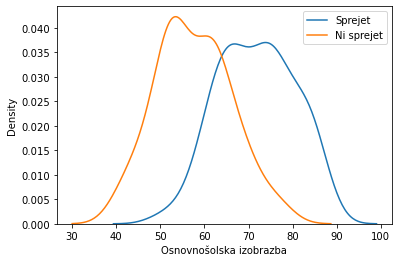

In [11]:
sns.kdeplot(df.ssc_p[df.status=="Placed"])
sns.kdeplot(df.ssc_p[df.status=="Not Placed"])
plt.legend(["Sprejet", "Ni sprejet"])
plt.xlabel("Osnovnošolska izobrazba")
plt.show()

Vsi študenti z dobro opravljenim zaključnim osnovnošolskim izpitom so bili sprejeti.

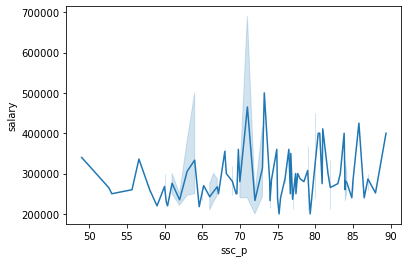

In [12]:
sns.lineplot("ssc_p", "salary", data=df)
plt.show()

Ni prepoznati določene korelacije med osnovnošolsko izobrazbo in višino plače.

### Ali so uspešni osnovnošolci prav tako uspešni v srednji šoli?

Pearsons correlation: 0.512


<AxesSubplot:xlabel='ssc_p', ylabel='hsc_p'>

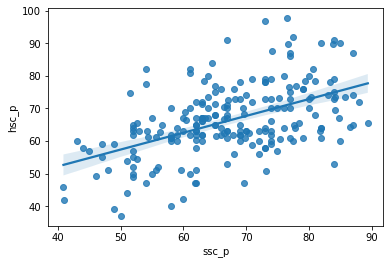

In [13]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df['ssc_p'], df['hsc_p'])
print('Pearsons correlation: %.3f' % corr)
sns.regplot(x='ssc_p',y='hsc_p',data=df)

Korelacija je 0.51, kar ni preveč povezano, vendar vseeno nakazuje majhno korelacijo.

### Ali srednješolska izobrazba vpliva na sprejem na delovno mesto in višino plače?

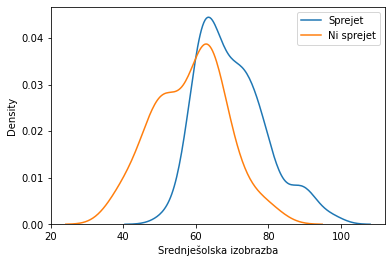

In [14]:
sns.kdeplot(df.hsc_p[ df.status=="Placed"])
sns.kdeplot(df.hsc_p[ df.status=="Not Placed"])
plt.legend(["Sprejet", "Ni sprejet"])
plt.xlabel("Srednješolska izobrazba")
plt.show()

Tudi tukaj približno kot pri osnovnošolski izobrazbi vidimo trend, da je več sprejetih, če so imeli boljše rezultate. Pri manj kot 60% vidimo, da krivulja strmo pada.

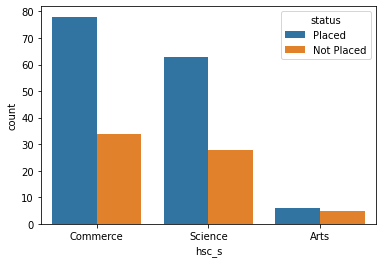

In [15]:
sns.countplot("hsc_s", hue="status", data=df)
plt.show()

Na področju Arts imamo zelo malo študentov. Pri ostalih dveh področjih pa vidimo, da so sprejeti in nesprejeti pri obeh področjih v razmerju približno 2:1.

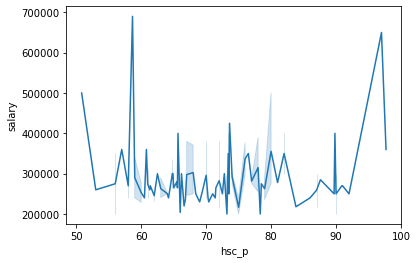

In [16]:
sns.lineplot("hsc_p", "salary", data=df)
plt.show()

Pri srednješolski izobrazbi ne opazimo trenda, da bi vplival na višino plače.

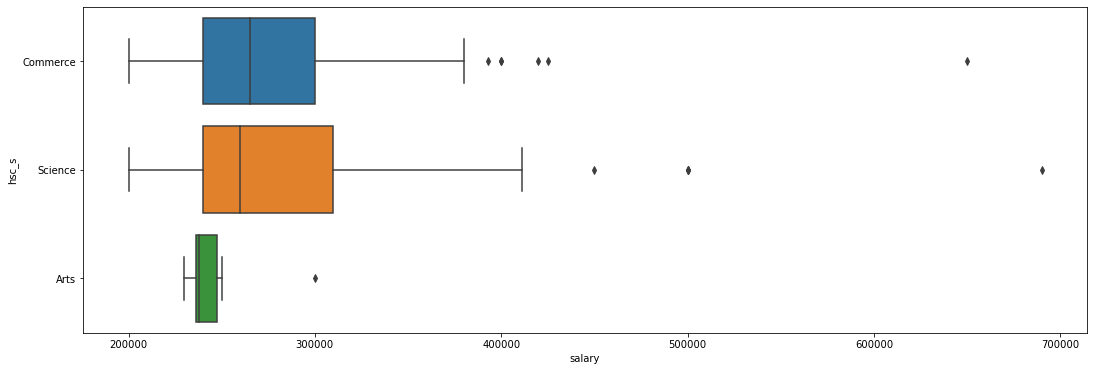

In [17]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "hsc_s", data=df)
plt.show()

Zaradi majhnega števila študentov iz področja Arts ne moremo rečti zagotovo, vendar v našem primeru dobivajo manjše plače kot ostali. Področje srednješolskega šolanja torej vpliva na višino plače.

### Ali dodiplomski študij vpliva na višino plače?

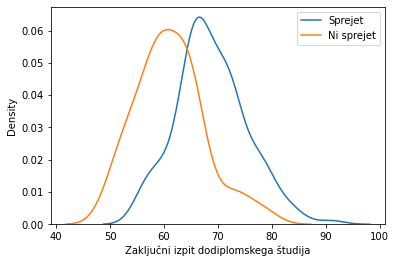

In [18]:
sns.kdeplot(df.degree_p[df.status=="Placed"])
sns.kdeplot(df.degree_p[df.status=="Not Placed"])
plt.legend(["Sprejet", "Ni sprejet"])
plt.xlabel("Zaključni izpit dodiplomskega študija")
plt.show()

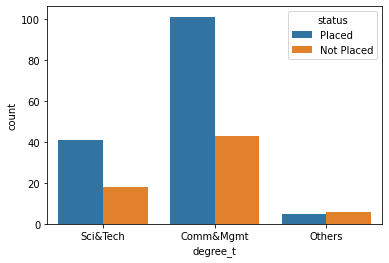

In [19]:
sns.countplot("degree_t", hue="status", data=df)
plt.show()

Na grafu lahko vidimo, da področje dodiplomskega študija vpliva na iskanje zaposllitve. Zanimivo je, da je pri "Others" več negativnih sprejetij kot pozitivnih. Pri ostalih dveh področjih so na delo sprejeti v razmerju približno 2:1.

<AxesSubplot:xlabel='degree_t', ylabel='salary'>

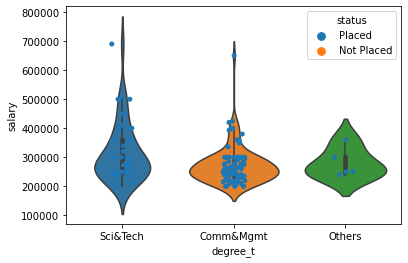

In [20]:
sns.violinplot(x="degree_t", y="salary", data=df)
sns.stripplot(x="degree_t", y="salary", data=df, hue='status')

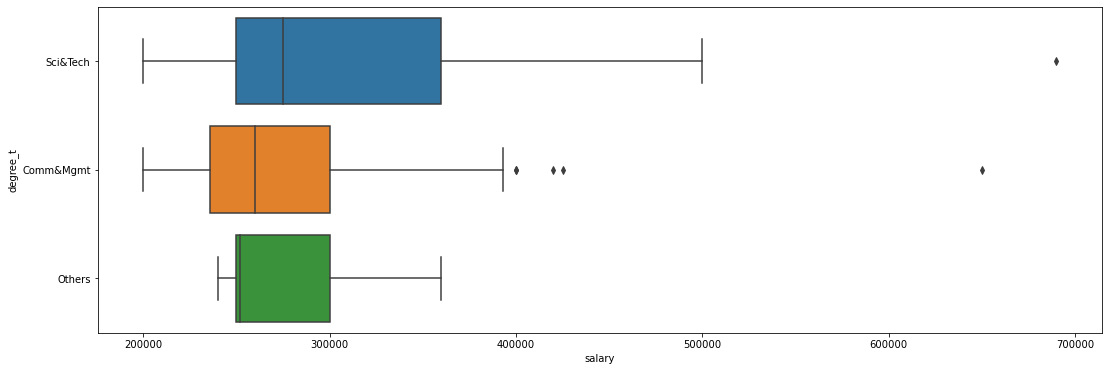

In [21]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "degree_t", data=df)
plt.show()

Science&Tech študentje imajo povprečno nekoliko višje plače, opazimo tudi nekaj ekstremnih vrednosti, ki odstopajo iz množice.

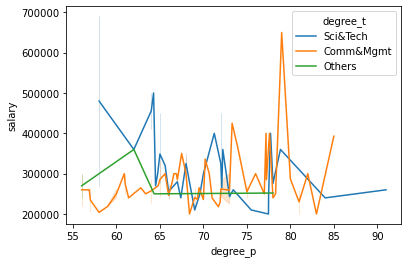

In [22]:
sns.lineplot("degree_p", "salary", hue="degree_t", data=df)
plt.show()

Iz slednjega grafa ne vidimo korelacije med zaključno oceno podiplomskega študija in višino plače.

### Kaj pa delovne izkušnje?

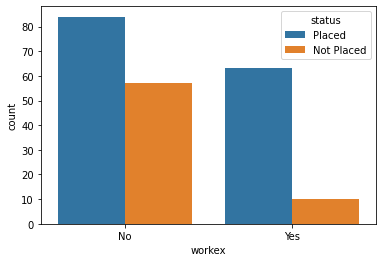

In [23]:
sns.countplot("workex", hue="status", data=df)
plt.show()

Zelo malo študentov z delovnimi izkušnjami ni dobilo željenega dela.

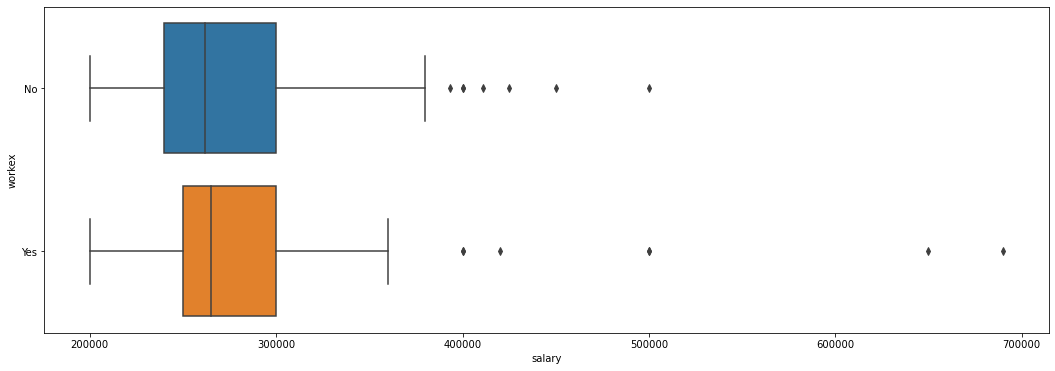

In [24]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "workex", data=df)
plt.show()

Plače so približno enake, vendar nekateri posamezniki z delovnimi izkušnjami izstopajo.

Vidimo tudi, da je pri študentih z delovnimi izkušnjami premaknjena tudi spodnja meja plače.

### Ali je določeno področje boljše od drugih?

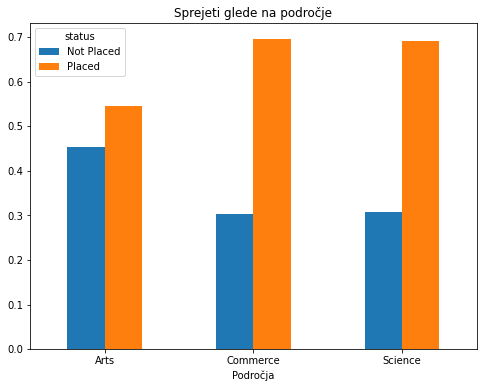

In [25]:
df.groupby("hsc_s").status.value_counts(normalize=True).unstack(1).plot.bar(title = "Sprejeti glede na področje", rot=0, figsize = (8,6)).set_xlabel("Področja");

Medtem ko sta si področji Commerce in Science zelo podobni, največ študentov ni bilo sprejetih pri področju Arts. V vseh primerih je bilo vseeno več študentov vedno sprejetih na delo, kot pa da niso bili sprejeti na delo.

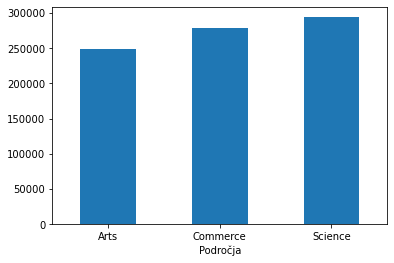

In [26]:
df.groupby("hsc_s").salary.mean().plot.bar(rot=0).set_xlabel("Področja");

Zgornji graf prikazuje povprečne plače glede na posamezno področje. Najvišje ponujene povprečne plače so na področju "Science", najnižje pa na področju "Arts".

## Klasifikacija - bodo sprejeti ali ne?

Odstranimo stolpce ssc_b in hsc_b (področje osnovnošolskega in srednješolskega šolanja), saj ne vplivata pomembno na končno klasifikacijo.

In [27]:
df.drop(['ssc_b','hsc_b'], axis=1, inplace=True)

Podatke še primerno predpripravimo.

In [28]:
df.dtypes

gender             object
ssc_p             float64
hsc_p             float64
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [29]:
from sklearn.preprocessing import LabelEncoder
df1 = df.copy(deep=True)

seznam = ["gender", "hsc_s", "degree_t", "workex", "specialisation", "status"]

for element in seznam:
    df1[element]=LabelEncoder().fit_transform(df1[element])
    
df1.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,
1,1,67.00,91.00,1,58.00,2,0,55.0,1,58.80,1,270000.0
2,1,79.33,78.33,2,77.48,2,1,86.5,0,66.28,1,200000.0
3,1,65.00,68.00,0,64.00,0,0,75.0,0,57.80,1,250000.0
4,1,56.00,52.00,2,52.00,2,0,66.0,1,59.43,0,NaN
5,1,85.80,73.60,1,73.30,0,0,96.8,0,55.50,1,425000.0


Stolpec sl_no, ki predstavlja identifikator, za klasifikacijo ne uporabimo.
Prav tako izpustimo "salary", saj atribut ni relevanten pri določanju, ali bodo študentje sprejeti. Napovedujemo "status".

Uporabili bomo različne klasifikatorje in videli, kateri nam dajo najboljše rezultate.

Poleg tega si bomo pomagali tudi z navzkrižno validacijo z desetimi rezi. Metrika ocenjevanje je "accuracy" oziroma točnost.

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

x = df1[['gender', 'ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'workex','etest_p', 'specialisation', 'mba_p']]
y = df1['status']

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier

klasifikatorji = []
klasifikatorji.append(DecisionTreeClassifier())
klasifikatorji.append(LogisticRegression())
klasifikatorji.append(LinearSVC())
klasifikatorji.append(KNeighborsClassifier())
klasifikatorji.append(GaussianNB())
klasifikatorji.append(RandomForestClassifier())
klasifikatorji.append(ExtraTreesClassifier())
klasifikatorji.append(AdaBoostClassifier())
klasifikatorji.append(GradientBoostingClassifier())

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

a=[]
b=[]

for klasifikator in klasifikatorji:
    kfold = StratifiedKFold(n_splits=10)
    cv_rezultati = cross_val_score(klasifikator,
                                   x,
                                   y,
                                   cv=kfold,
                                   scoring='accuracy') 
    
    print('%30s:\t%1.4f' % (type(klasifikator).__name__, cv_rezultati.mean()))
    a.append(type(klasifikator).__name__)
    b.append(cv_rezultati.mean())

        DecisionTreeClassifier:	0.7987
            LogisticRegression:	0.8792
                     LinearSVC:	0.8043
          KNeighborsClassifier:	0.8459
                    GaussianNB:	0.8171
        RandomForestClassifier:	0.8742
          ExtraTreesClassifier:	0.8597
            AdaBoostClassifier:	0.8359
    GradientBoostingClassifier:	0.8554


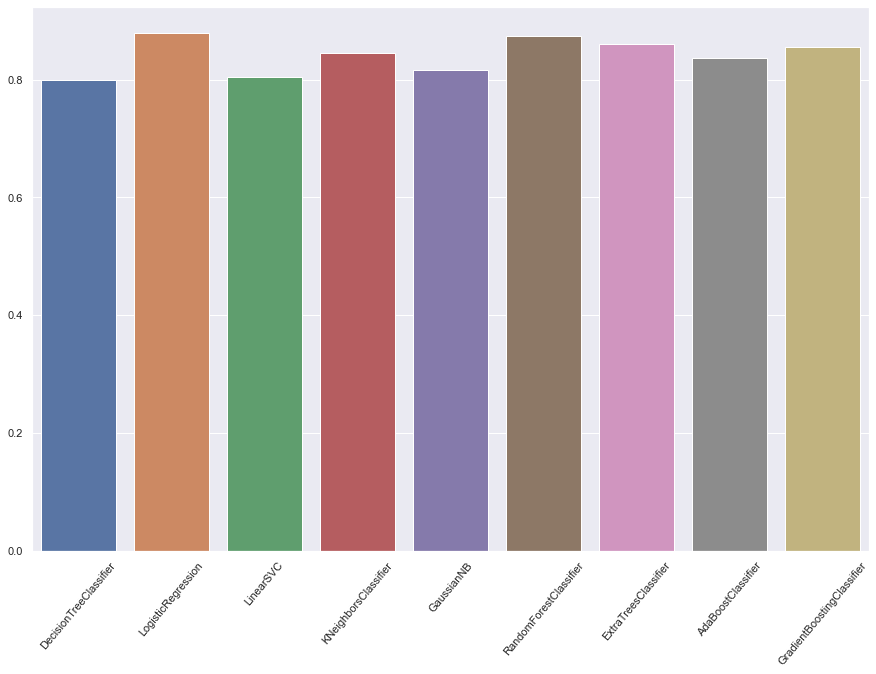

In [32]:
plt.figure(figsize=(15,10))
sns.set()
sns.barplot(x=a, y=b)
plt.xticks(rotation=50)
plt.show()

Najboljše rezultate (točnost: 88 %) nam da klasifikator LogisticRegression, zato si ga poglejmo podrobneje.

Podatke razdelimo na dva dela - testno in učno množico. Testno množico potrebujemo za vrednostenje kakovosti zgrajenega klasifikacijskega modela, to so tudi podatki, ki jih klasifikator ne uporabi pri učenju. V našem primeru smo testno in učno množico razdelili v razmerju 30:70.

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [34]:
data = {'Realni':y_test[:20],
        'Napovedani':y_pred[:20]}

comp = pd.DataFrame(data)
comp

,Realni,Napovedani
sl_no,,
9,1,1
103,1,1
181,1,1
90,1,1
82,1,1
192,1,1
115,1,1
94,0,0
173,1,1


Primerjava med prvimi desetimi primerki, vidimo, da je napoved precej dobra.

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69        14
           1       0.92      0.90      0.91        51

    accuracy                           0.86        65
   macro avg       0.79      0.81      0.80        65
weighted avg       0.87      0.86      0.86        65



V tabeli so predstavljene metrike za LogisticRegression. 

Vrednost 0 predstavlja, da študent ni bil sprejet, 1 pa da je bil sprejet.

### Predikcija višine plače s pomočjo regresije

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [37]:
df2 = df.copy(deep=True)
df2.dropna(inplace=True)
df2.drop("status", axis=1, inplace=True)

Znebimo se NaN vrednosti in statusa, saj ne vpliva na predikcijo.

In [38]:
df2.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
sl_no,,,,,,,,,,,
1,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.0
2,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.0
3,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.0
5,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,425000.0
8,M,82.00,64.00,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,252000.0


In [39]:
seznam = ["gender", "hsc_s", "degree_t", "workex", "specialisation"]

for element in seznam:
    df2[element]=LabelEncoder().fit_transform(df2[element])
    
df2.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
sl_no,,,,,,,,,,,
1,1,67.00,91.00,1,58.00,2,0,55.0,1,58.80,270000.0
2,1,79.33,78.33,2,77.48,2,1,86.5,0,66.28,200000.0
3,1,65.00,68.00,0,64.00,0,0,75.0,0,57.80,250000.0
5,1,85.80,73.60,1,73.30,0,0,96.8,0,55.50,425000.0
8,1,82.00,64.00,2,66.00,2,1,67.0,0,62.14,252000.0


Podatke smo pretvorili v številske. Zdaj bomo odstranili še stolpec "salary", katerega bomo poskušali napovedati.

In [40]:
y = df2["salary"]
x = df2.drop("salary", axis=1)
column_names = x.columns.values

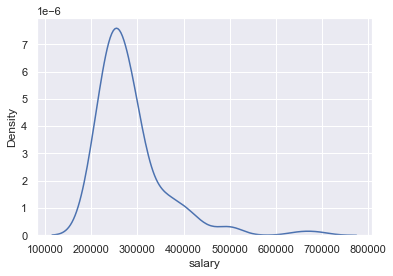

In [41]:
sns.kdeplot(y)
plt.show()

Uporabimo še StandardScaler, ki številske parametre standardizira, kar nam bo omogočilo bolje naučen model.

In [42]:
x_scaled = StandardScaler().fit_transform(x)

Za regresijski algoritem bomo uporabili linearno regresijo.

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=100)

regr = LinearRegression()
regr.fit(x_train, y_train)

rezultat = regr.predict(x_test)

In [44]:
df_predictions = pd.DataFrame()
df_predictions["dejanski"]= y_test.to_numpy()
df_predictions["predicted"]= rezultat

df_predictions.head(10)

,dejanski,predicted
0,255000.0,327376.038235
1,300000.0,328337.505536
2,340000.0,316894.306176
3,240000.0,268009.958493
4,236000.0,291393.774223
5,300000.0,254974.879121
6,265000.0,289958.236811
7,220000.0,236353.963600
8,275000.0,347396.941222
9,275000.0,274339.411910


Po predikciji vidimo, da se je algoritem linearne regresije izkazal precej slabo. Nekatere vrednosti so sicer dobro napovedane, vendar pri veliko primerkih prihaja do precejšnjih odstopanj.

Poglejmo primerjavo še na grafu.

<AxesSubplot:>

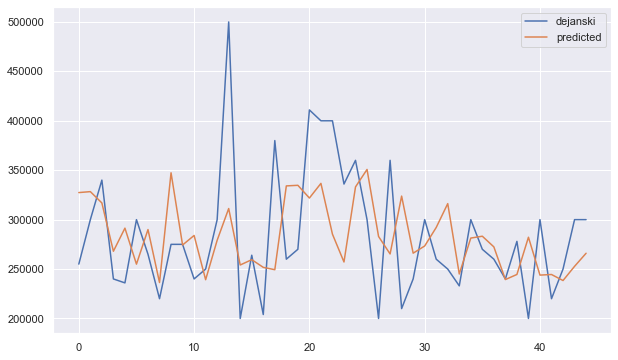

In [45]:
df_predictions.plot.line(figsize=(10,6))

Poskusimo še druge regresijske algoritme, kot so ExtraTreesRegressor, SVR in RandomForestRegressor.

In [46]:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.svm import SVR

algoritmi = [LinearRegression(), ExtraTreesRegressor(), SVR(), RandomForestRegressor()]

temp = []
array = []
a = []

for algoritem in algoritmi:
    rezultati = cross_val_score(algoritem, 
                                   x_scaled,
                                   y,
                                   cv=10,
                                   scoring='explained_variance') 

    temp.append([type(algoritem).__name__, rezultati.mean()])
    array.append(rezultati.mean())
    a.append(type(algoritem).__name__)

In [47]:
df_graf = pd.DataFrame()
df_graf["algoritmi"] = a;
df_graf["vrednosti"] = array;
df_graf

,algoritmi,vrednosti
0,LinearRegression,-0.074561
1,ExtraTreesRegressor,-0.402360
2,SVR,0.000023
3,RandomForestRegressor,-0.167152


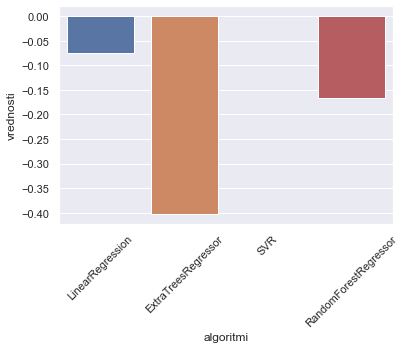

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x = 'algoritmi',
            y = 'vrednosti',
            data = df_graf)

plt.xticks(rotation=45)
plt.show()

Najboljše rezultate nam da SVR, medtem ko sledi LinearRegression. RandomForestRegressor in ExtraTreesRegressor se v tem primeru izkažeta za slabša algoritma, vendar noben od algoritmov ne dosega rezultatov, za katere bi lahko rekli, da so dovolj dobri za uporabo v praksi.